In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pyspike as spk

In [31]:
# Create a dictionary to store values for each time bin
ext = '.txt'
time_bin_data = {'time_bin_end': [], 'a_values': [], 'seed_values': []}
g = 1
gn = 1
# Define parameters for time bin calculation
bin_size = 500  # 500 ms time bins
max_time = 50000  # Total time duration
pg = g*0.75 - gn*0.25
a = [7]

In [32]:
A = np.zeros((num_neurons, num_neurons))
for i in range(81):
                row_i = i // 9
                col_i = i % 9
                subgrid_i = (row_i // 3) * 3 + (col_i // 3)
                for j in range(i + 1, num_neurons):
                    if i != j:
                        row_j = j // 9
                        col_j = j % 9
                        subgrid_j = (row_j // 3) * 3 + (col_j // 3)
                        if row_i == row_j or col_i == col_j or subgrid_i == subgrid_j:
                            A[i, j] = -1
                            A[j, i] = -1
                        else:
                            A[i, j] = 1
                            A[j, i] = 1                      
                    else:
                        A[i, j] = 0

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500


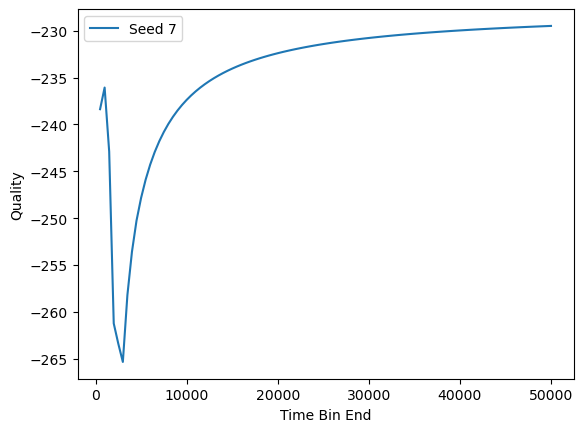

In [33]:
for seed in a:
    file_name = str(seed)+ '_0.00016_0.035' + ext
    spike_trains = spk.load_spike_trains_from_txt(file_name, edges=(0, max_time))
    num_neurons = len(spike_trains)
    spike_distance_matrix = np.zeros((num_neurons, num_neurons))
    Q = np.zeros((num_neurons, num_neurons))
    for time_bin_start in range(0, max_time, bin_size):
        time_bin_end = time_bin_start + bin_size
        print(time_bin_start)
        for i in range(num_neurons):
                for j in range(i + 1, num_neurons):
                    psi = spk.spike_distance(spike_trains[i], spike_trains[j], interval=(0, time_bin_end))
                    spike_distance_matrix[i, j] = psi
                    spike_distance_matrix[j, i] = psi    
                    Q[i, j] = (A[i, j] - pg) * (1 - spike_distance_matrix[i, j]/spike_distance_matrix.max())
                    Q[j, i] = Q[i, j]
        # Calculate the sum of spike_distance_matrix values
        b = np.sum(Q.flatten())
        # Append the current values to the list
        time_bin_data['time_bin_end'].append(time_bin_end)
        time_bin_data['a_values'].append(-1*(b))
        time_bin_data['seed_values'].append(seed)
# Plot line plot with different colors for different seeds
for seed in set(time_bin_data['seed_values']):
    indices = [i for i, x in enumerate(time_bin_data['seed_values']) if x == seed]
    plt.plot(
        [time_bin_data['time_bin_end'][i] for i in indices],
        [time_bin_data['a_values'][i] for i in indices],
        label=f'Seed {seed}'
    )

plt.xlabel('Time Bin End')
plt.ylabel('Quality')
plt.legend()
plt.show()

    